# Ejercicio 3

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import math
import random
import scipy.stats
from scipy import optimize

In [2]:
golden_mean = (math.sqrt(5)-1.0)/2.0       # Aesthetic ratio
fig_width = 7+3/8                       # width  in inches
fig_height = fig_width*golden_mean         # height in inches
fig_size =  [fig_width,fig_height]

params = {'backend': 'ps',
          'axes.titlesize': 18,
          'axes.labelsize': 19,
          'axes.linewidth': 0.5, 
          'axes.grid': False,
          'axes.labelweight': 'normal',  
          'font.family': 'serif',
          'font.size': 18.0,
          'font.weight': 'normal',
          'text.color': 'black',
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'text.usetex': True,
          'legend.fontsize': 18,
          'figure.dpi': 700,
          'figure.figsize': fig_size,
          'savefig.dpi': 700,
         }

pylab.rcParams.update(params)

Leemos el archivo de datos

In [3]:
G=nx.read_gml('as-22july06.gml')

Creamos un array con el grado de cada nodo en cada una de sus componentes

In [5]:
def grados(G):    
    i=0
    vector_grados=[]
    cantidad_nodos = G.number_of_nodes()
    while i<cantidad_nodos:
        vector_grados+=[list(G.degree)[i][1]]
        i+=1
    return vector_grados

In [6]:
vector_grados=grados(G)

Creamos una función para calcular la distribución de grado de la red

In [68]:
def distr(vector_grados):
    i=0
    distr = np.zeros(max(vector_grados)+1)
    cantidad_nodos = G.number_of_nodes()
    
    while i<len(vector_grados):
        indice = vector_grados[i]
        distr[indice]+=1
        i+=1
        
    distr = distr / cantidad_nodos   
    return distr

In [69]:
distribucion_grado=distr(vector_grados)

Plot de la distibución de grado en escala lineal (ambos ejes) y usando un bineado lineal

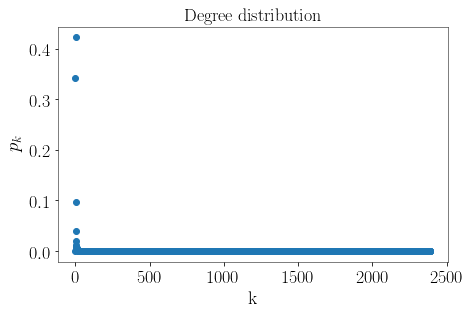

In [89]:
vector_k=np.linspace(0,max(vector_grados),len(distribucion_grado))
plt.plot(vector_k,distribucion_grado,'o')
pylab.xlabel('k')
pylab.ylabel('$p_k$')
plt.title('Degree distribution')
plt.show()

En el gráfico anterior podemos observar que la escala lineal (de ambos ejes) no nos permite visualizar de forma eficiente la distribución de grado de la red. Por otro lado, notemos que hay tres órdenes de magnitud entre el valor más chico de la distribución (k=0) y el más grande (k=2390). Por lo tanto, es conveniente usar una escala logarítmica para poder visualizar de forma más nitida la distribución. 

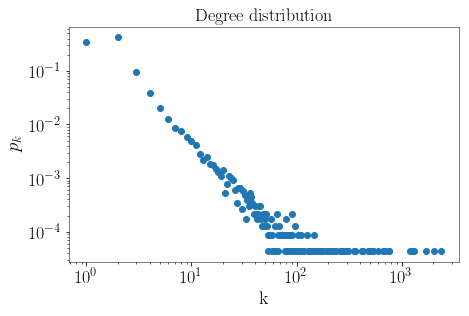

In [90]:
plt.plot(vector_k,distribucion_grado,'o')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
pylab.xlabel('k')
pylab.ylabel('$p_k$')
plt.title('Degree distribution')
plt.show()

Notemos que usando una escala logarítmica podemos apreciar mejor la forma de la distribución de grado de la red. En este caso, se observa que, salvo para los grados más chicos (k<5) y los más grandes(k>100), la red posee un comportamiento tipo $\textit{"power law"}$ ($p_k \backsim k^{-\gamma}$). Las redes cuya distribución de grado sigue una ley de potencias se llaman $\textit{redes libre de escala}$ [1].

Por otro lado, la "cola" de la distribución (k>100) tiene un comportamiento constante en k. Esto es consecuencia de haber utilizado un bineado lineal para realizar el gráfico. En este caso, como la cantidad de hubs (nodos con mucho grado) es chica, cada hub de grado k tiene una probabilidad aproximada de 1/N, siendo N la cantidad de nodos de la red. Por este motivo, se produce la cola constante al utilizar un bineado lineal.

A continuación se grafica la distribución en escala logarítmica y usando un bineado logarítmico en el eje x (k).

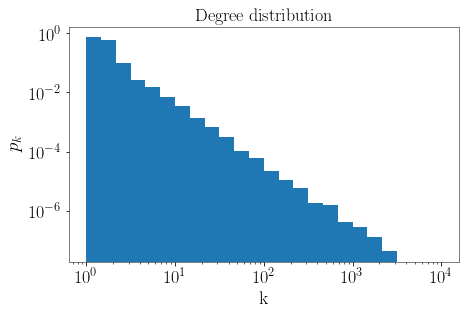

In [131]:
y, x, _ = plt.hist(vector_grados, bins=np.logspace(0,4, 25, endpoint=True, base=10.0),density=1)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
pylab.xlabel('k')
pylab.ylabel('$p_k$')
plt.title('Degree distribution')
plt.show()

Usando el bineado logarítmico el comportamiento constante de la cola de la distribución (escala lineal) desaparece ya que agrupamos varios "hubs" en un solo bin. De este modo, cada bin tiene una cantidad de datos comparable con sus respectivos vecinos. 

Realizamos un ajuste lineal de la distribución de grado de la red para hallar el exponente de la misma. Para llevar a cabo dicho ajuste, se elije un k mínimo de modo tal de no considerar los grados más bajos.  

In [155]:
from scipy import stats
kmin = 2
xlog = np.log10(x[kmin:len(y)-4])
ylog = np.log10(y[kmin:len(y)-4])

slope, intercept, r_value, p_value, std_err = stats.linregress(xlog, ylog)

Graficamos los datos junto con el ajuste correspondiente

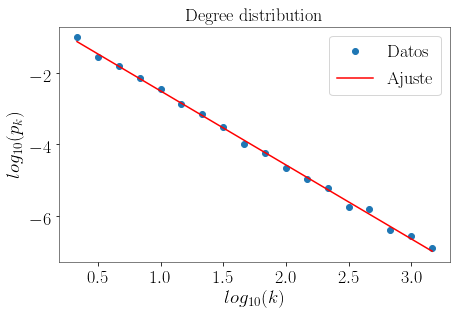

In [158]:
plt.plot(xlog, ylog, 'o', label='Datos')
plt.plot(xlog, intercept + slope*xlog, 'r', label='Ajuste')
pylab.xlabel('$log_{10}(k)$')
pylab.ylabel('$log_{10}(p_k)$')
plt.title('Degree distribution')
plt.legend()
plt.show()

In [159]:
print "Bondad del ajuste =",round(r_value**2,3)
print "Exponente de la distribución =",round(-slope,3)

Bondad del ajuste = 0.998
Exponente de la distribución = 2.062


De acuerdo al valor del exponente de la distribución, podemos afirmar (teniendo en cuenta la teoría de las redes $\textit{"free scale"}$) que el primer momento de la distribución ($<k>$) es finito, mientras que el segundo momento (y los superiores) divergen (en el límite $N\rightarrow\infty$). Como el segundo momento ($<k^2>$) permite calcular la varianza ($\sigma$), la misma no se encuentra bien definida en este tipo de redes con exponente menor a 3. Por lo tanto, no se puede determinar la $\textit{"escala"}$ de la red, ya que las fluctuaciones alrededor de $<k>$ son enormes. De modo tal que si se elige un nodo de forma arbitraria, su grado puede ser muy chico o muy grande (a priori no es posible estimar su valor). 

Por último, cabe destacar que las redes aleatorias siguen una distribución de grado tipo Poisson, en donde el segundo momento de la misma cumple $\sigma=<k>^{1/2}$, y por lo tanto, $<k>$ corresponde, aproximadamente, a la escala de la red.

Con el fin de corroborar lo expresado anteriormente, a continuación se calcula el primer y segundo momento de la distribución y la varianza de la misma.

Creamos una función para calcular los momentos de la distribución

In [160]:
def momentos(distribucion):
    i = 0
    m1 = 0
    m2 = 0
    
    while i<len(distribucion):
        m1 += i * distribucion[i]
        m2 += i * i * distribucion[i]
        
        i+=1
    varianza = m2 - m1*m1    
    momentos = [m1,m2,varianza]    
        
    return momentos

In [161]:
momentos = momentos(distribucion_grado)
print "Primer momento =",round(momentos[0],3)
print "Segundo momento =",round(momentos[1],3)
print "Varianza =",round(momentos[2],3)

Primer momento = 4.219
Segundo momento = 1103.0
Varianza = 1085.204


Estos resultados son consistentes con lo explicado anteriormente. Es decir, no es posible determinar la escala de la red debido al elevado valor de la varianza respecto del primer momento de la distribución ($<k>$). 

Función distribución acumulada

Otra manera de eliminar la cola constante de la distribución es calcular la distribución acumulada ($P_k=\sum_{q=k}^\infty p_q$). En este caso, para una distribución libre de escala se cumple que ($P_k \backsim k^{-\gamma+1}$). Por lo tanto, este método permite, de otra forma, obtener el exponente de la distribución ($\gamma$). Cabe destacar que a diferencia de los métodos utilizados anteriormente, en este caso no se utiliza ningún tipo de bineado.  

Para calcular la distribución acumulada, creamos la siguiente función:

In [162]:
def Cumulative_Distribution(distribucion_grado):
    k=0
    l = len(distribucion_grado)
    cumulative_vector = np.zeros(l+1)
    
    while k<l: 
        i=k
        while i<l:
            cumulative_vector[k]+=distribucion_grado[i]
            i+=1
        k+=1
    return cumulative_vector

In [164]:
cumulative_distribution = Cumulative_Distribution(distribucion_grado)

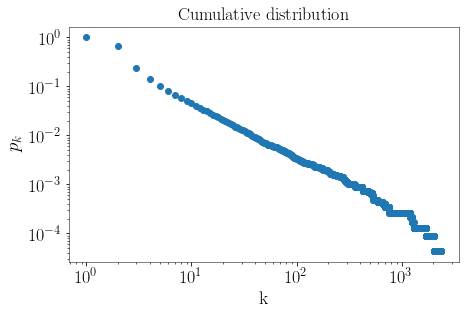

In [170]:
plt.plot(cumulative_distribution,'o')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
pylab.xlabel('k')
pylab.ylabel('$p_k$')
plt.title('Cumulative distribution')
plt.show()

In [185]:
kmin = 10
kmax = 500
vector_k=np.linspace(0,max(vector_grados),len(distribucion_grado))
xlog = np.log10(vector_k[kmin:kmax])
ylog = np.log10(cumulative_distribution[kmin:kmax])

slope, intercept, r_value, p_value, std_err = stats.linregress(xlog, ylog)

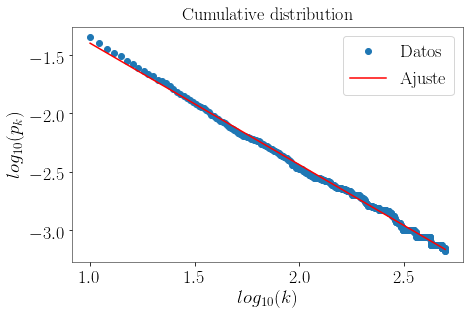

In [186]:
plt.plot(xlog, ylog, 'o', label='Datos')
plt.plot(xlog, intercept + slope*xlog, 'r', label='Ajuste')
pylab.xlabel('$log_{10}(k)$')
pylab.ylabel('$log_{10}(p_k)$')
plt.title('Cumulative distribution')
plt.legend()
plt.show()

In [189]:
print "Bondad del ajuste =",round(r_value**2,3)
print "Pendiente de la recta =",round(slope,3)

Bondad del ajuste = 0.997
Pendiente de la recta = -1.043


Por lo tanto, el exponente de la distribución ($\gamma$) vale 2.043. Notemos que este resultado coincide con el valor obtenido anteriormente mediante la distribución de grado ($\gamma$=2.062).

Referencias:

[1] A.-L. Barabási and R.Albert. Emergence of scaling in random networks. Science, 286:509-512, 1999. 

[2] M. Newman. Networks: An Introduction. Oxford University, Oxford, 2010.